In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

import band_count

In [2]:
data_dir = "./data/"
data_fn = data_dir + "cleaned_data.txt"
data_grey_fn = data_dir + "cleaned_grey_values.txt"
all_elements = pd.read_csv(data_fn)
print(all_elements.head())

   Distance (um)  Elapsed Time   B11_ppm  Na23_ppm  Mg25_ppm  Al27_ppm  \
0      -1.483983     -1.483983 -0.000987 -1.739987  1.252779 -1.428722   
1      -1.478071     -1.478071  0.273978 -0.963147  2.358353 -1.189735   
2      -1.472164     -1.472164 -0.041514 -1.274842  1.587131 -0.879393   
3      -1.466252     -1.466252  0.646814 -0.961113  1.437627 -1.582681   
4      -1.460344     -1.460344  0.151465 -1.214546  1.474992 -1.570397   

   Si28_ppm   P31_ppm   S34_ppm  Cl35_ppm  ...  Zn66_ppm  Zn68_ppm  Sr88_ppm  \
0 -1.030042  1.095407  0.576121 -1.078462  ...  1.409131  1.572304  1.231484   
1 -0.483173  1.588047  1.585102 -1.104329  ...  1.439062  1.372410  0.979279   
2 -0.694485  1.389658  0.317097 -0.880657  ...  1.674240  1.736563  0.941318   
3 -1.052700  1.525399 -0.236500 -1.136729  ...  1.628649  1.488895 -0.189878   
4 -1.296695  1.237596 -0.067184 -1.486543  ...  1.335298  1.297910  0.958900   

   Ba138_ppm  PbTotal_ppm     pixel  new_distance  new_pixel  case  sex  


In [3]:
grey_values = pd.read_csv(data_grey_fn)
print(grey_values)

      Distance_(pixels)  Gray_Value  new_pixel  case  cleaned_grey sex
0                   432    126.7965          0    43      4.842583   M
1                   433    126.2878          1    43      4.838563   M
2                   434    123.3846          2    43      4.815306   M
3                   435    120.0393          3    43      4.787819   M
4                   436    118.5882          4    43      4.775657   M
...                 ...         ...        ...   ...           ...  ..
5678               1746    104.8251       1480    56      4.631919   F
5679               1747    104.6929       1481    56      4.631425   F
5680               1748    103.3024       1482    56      4.637661   F
5681               1749    101.6086       1483    56      4.621128   F
5682               1750    101.0000       1484    56      4.615121   F

[5683 rows x 6 columns]


In [159]:
elt_name = "Sr88_ppm" # "Cu65_ppm" # "Zn66_ppm" # "Mg25_ppm" # "S34_ppm" # 
elt_array = [
    all_elements[all_elements['case']==i][elt_name] for i in [43,44,55,56]
]
print([len(arr) for arr in elt_array])

[461, 320, 570, 711]


In [4]:
grey_array = [
    grey_values[grey_values['case']==i]["Gray_Value"] for i in [43,44,55,56]
]

In [ ]:
scale_switch = 50
max_age = 40

[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589. -588. ...  588.  589.  590.]
1181
1181
[-590. -589.

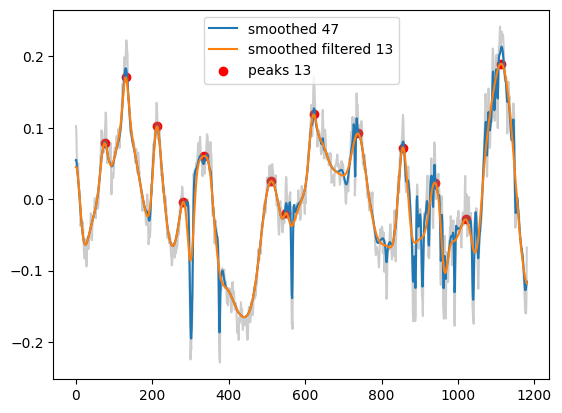

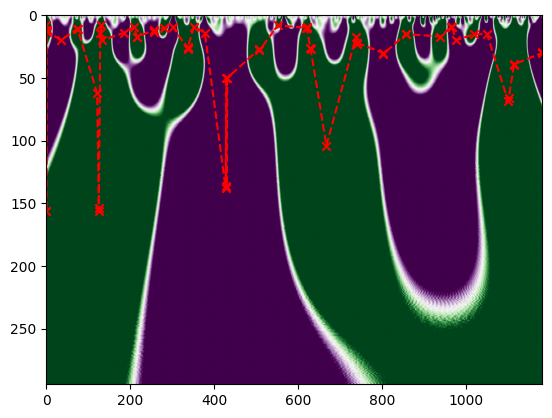

47
15
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638. -637. -636. ...  636.  637.  638.]
1277
1277
[-638.

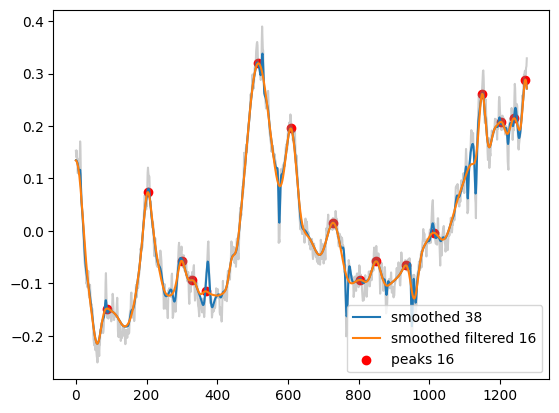

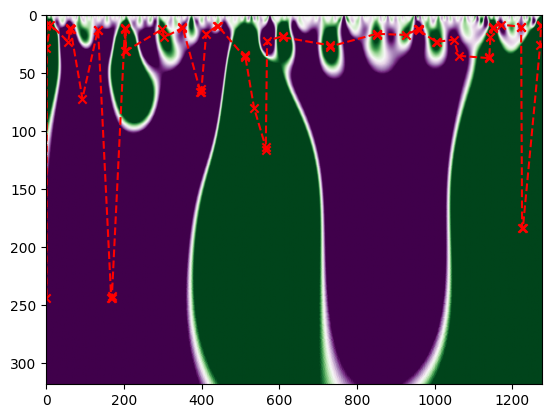

50
13
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 -868.5 -867.5 ...  867.5  868.5  869.5]
1740
1740
[-869.5 

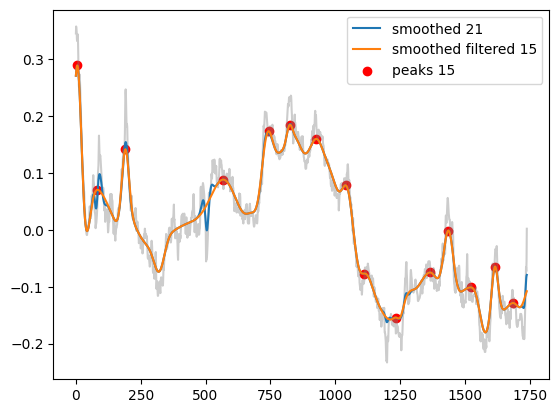

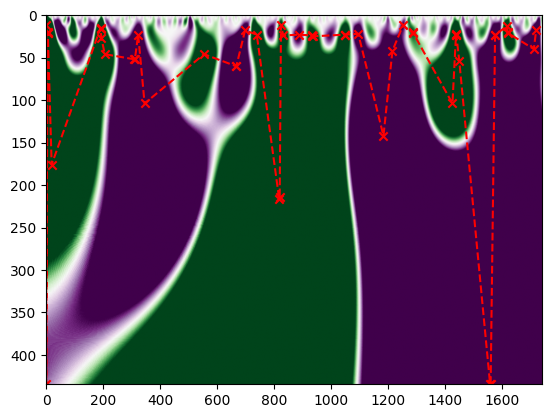

39
8
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. -741. -740. ...  740.  741.  742.]
1485
1485
[-742. 

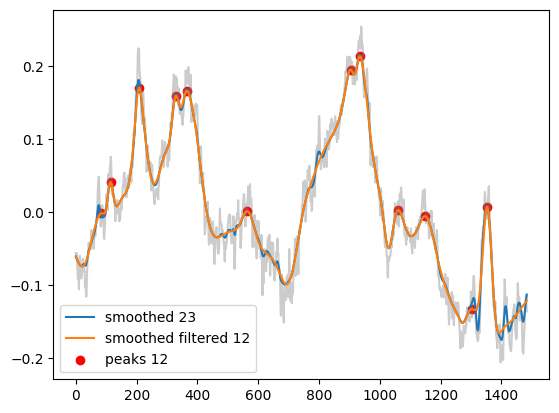

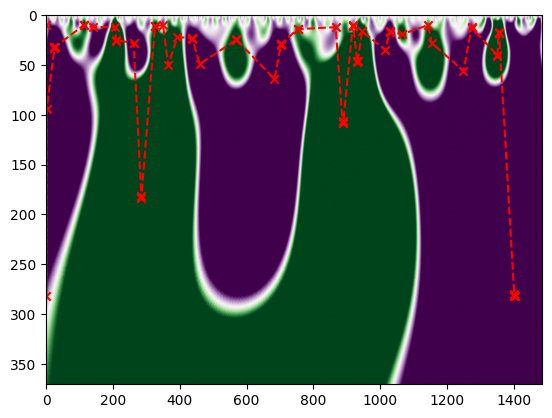

43
16


In [ ]:
plts = []
coefs = []
for i in range(len(grey_array)):
    ts = np.asarray(grey_array[i], dtype=np.float64)
    ts -= np.mean(ts)

    switch_idx = max(2, min(len(ts) // 4 + 1, scale_switch + 1))
    last_idx = max(2, len(ts) // 4 + 1)
    scales1 = np.arange(1, switch_idx)
    scales2 = np.arange(switch_idx, last_idx, step=2)
    scales = np.concatenate((scales1, scales2))

    shifts = np.concatenate((np.ones(len(scales1)),2*np.ones(len(scales2))))
    
    dictionary = bpdn.ricker_cwt_dictionary(len(ts), scales, shifts, dtype=np.float64)
    dictionary_cpy = dictionary.copy()

    # dictionary terms with scale=n are 'mounds' with approx 3.6n points.
    # Mounds which are too short can be filtered out to help smooth the signal.
    min_pts_per_year = len(ts)/max_age
    print(f"min_pts_per_year: {min_pts_per_year}")
    expanded_scales = bpdn.expand_scales(len(ts), scales, shifts)
    pts_per_mound = 3.6*expanded_scales
    # plt.figure()
    # plt.plot(pts_per_mound)
    # plt.ylim((0,100))
    # plt.show()
    low_freq_scales_ix = pts_per_mound > (min_pts_per_year)

    def peak_prior(coef, X=dictionary_cpy, low_freq_ix=low_freq_scales_ix):
        low_freq_coef = coef * low_freq_ix[:, np.newaxis]
        smoothed = np.dot(X, low_freq_coef)
        prior_pdf = np.zeros(smoothed.shape[1])
        for model_ix in range(smoothed.shape[1]):
            peaks = filt.find_peaks(smoothed[:,model_ix])
            age = len(peaks)
            prior_pdf[model_ix] = truncated_geometric_pdf(mortality_rate, age)
        return prior_pdf

    coef, smoothed = bpdn.basis_pursuit_denoising(ts, dictionary, peak_prior, copy_dictionary=True)
    smoothed = np.dot(dictionary_cpy, coef)

    low_freq_coef = coef * low_freq_scales_ix
    low_freq_smoothed = np.dot(dictionary_cpy, low_freq_coef)
    
    p = plt.figure()
    p = plt.plot(ts, color="grey", alpha=0.4)
    n_peaks_smoothed = len(filt.find_peaks(smoothed))
    p = plt.plot(smoothed, label=f"smoothed {n_peaks_smoothed}")
    peak_locations = filt.find_peaks(low_freq_smoothed)
    n_peaks = len(peak_locations)
    p = plt.plot(low_freq_smoothed, label=f"smoothed filtered {n_peaks}")
    p = plt.scatter(peak_locations, low_freq_smoothed[peak_locations], label=f"peaks {n_peaks}", color="red")
    p = plt.legend()
    plt.show()
    
    # print(np.count_nonzero(coef))
    # plts.append(p)
    # plt.figure()
    # plt.plot(coef, label="Coefs")
    # plt.show()
    # coefs.append(coef)

    cwt, freqs = pywt.cwt(ts, np.arange(1,len(ts)//4+1), 'mexh')

    expanded_shifts = bpdn.dictionary_shifts(len(ts), scales, shifts)

    non_zero_coef_idx = np.abs(low_freq_coef) > np.finfo(low_freq_coef.dtype).eps

    plt.figure()
    wlb=np.quantile(cwt,0.1)/10
    wub=np.quantile(cwt,0.9)/10
    plt.imshow(cwt, cmap='PRGn', aspect='auto',
            vmax=-wlb, vmin=wlb)
    x = np.zeros(np.sum(non_zero_coef_idx)+2)
    y = np.zeros(np.sum(non_zero_coef_idx)+2)
    x[1:-1] = expanded_shifts[non_zero_coef_idx]-tmin
    y[1:-1] = expanded_scales[non_zero_coef_idx]-1
    x[0] = 0
    x[-1] = 0
    y[0] = y[1]
    y[-1] = y[-2]
    sixd = np.argsort(x)
    x = x[sixd]
    y = y[sixd]
    plt.scatter(x,y, marker='x', color='red')
    plt.plot(x,y, color='red', linestyle='dashed')
    plt.show()

    wlcount = 0 
    for i in range(len(x)-1):
        wlcount += detect_seg(x[i], y[i], x[i+1], y[i+1], cwt, elt)
    print(wlcount)

    wlcount2 = 0 
    wlcount2 += detect_path(x,y, cwt, elt)
    print(wlcount2)

    




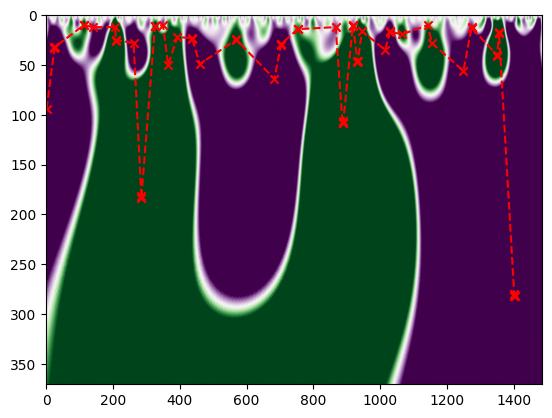

In [171]:
cwt, freqs = pywt.cwt(elt, np.arange(1,len(elt)//4+1), 'mexh')

tmin = -len(elt)//2 + (len(elt)%2)/2
tmax = len(elt)//2 + (len(elt)%2)/2
expanded_shifts = []
for (i, scale) in enumerate(scales):
    delta = shifts[i]
    centers = np.arange(tmin+delta/2, tmax, step=delta, dtype=float)
    expanded_shifts.append(centers)
expanded_shifts = np.concatenate(expanded_shifts)

non_zero_coef_idx = np.abs(low_freq_coef) > np.finfo(low_freq_coef.dtype).eps

plt.figure()
wlb=np.quantile(cwt,0.1)/10
wub=np.quantile(cwt,0.9)/10
plt.imshow(cwt, cmap='PRGn', aspect='auto',
        vmax=-wlb, vmin=wlb)
x = expanded_shifts[non_zero_coef_idx]-tmin
y = expanded_scales[non_zero_coef_idx]-1
sixd = np.argsort(x)
x = x[sixd]
y = y[sixd]
plt.scatter(x,y, marker='x', color='red')
plt.plot(x,y, color='red', linestyle='dashed')
plt.show()

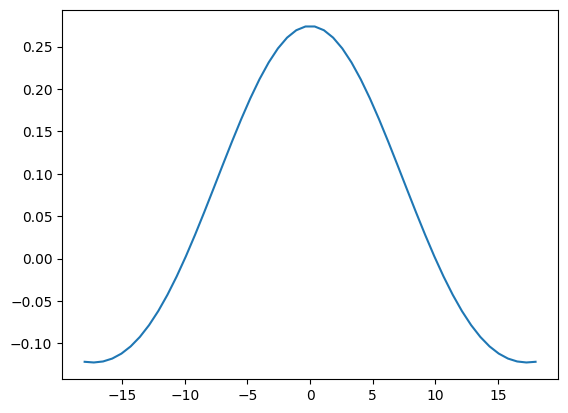

In [172]:
scale = expanded_scales[low_freq_scales_ix][0]-1
x = np.linspace(-1.8*scale, 1.8*scale)
y = bpdn._ricker_wavelet(x, scale, 0)
plt.figure()
plt.plot(x, y, label=f"Ricker with scale {scale}")
plt.show()

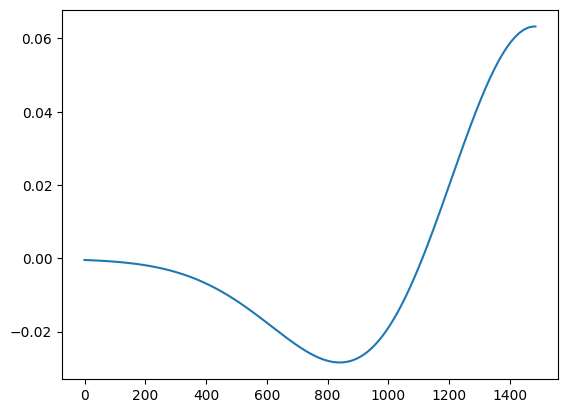

In [173]:
plt.figure()
plt.plot(dictionary[:,-1])
plt.show()

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  55  57
  59  61  63  65  67  69  71  73  75  77  79  81  83  85  87  89  91  93
  95  97  99 101 103 105 107 109 111 113 115]
[-230. -229. -228. -227. -226. -225. -224. -223. -222. -221. -220. -219.
 -218. -217. -216. -215. -214. -213. -212. -211. -210. -209. -208. -207.
 -206. -205. -204. -203. -202. -201. -200. -199. -198. -197. -196. -195.
 -194. -193. -192. -191. -190. -189. -188. -187. -186. -185. -184. -183.
 -182. -181. -180. -179. -178. -177. -176. -175. -174. -173. -172. -171.
 -170. -169. -168. -167. -166. -165. -164. -163. -162. -161. -160. -159.
 -158. -157. -156. -155. -154. -153. -152. -151. -150. -149. -148. -147.
 -146. -145. -144. -143. -142. -141. -140. -139. -138. -137. -136. -135.
 -134. -133. -132. -131. -130. -129. -128. -127. -126. -125. -124. -123.
 -122

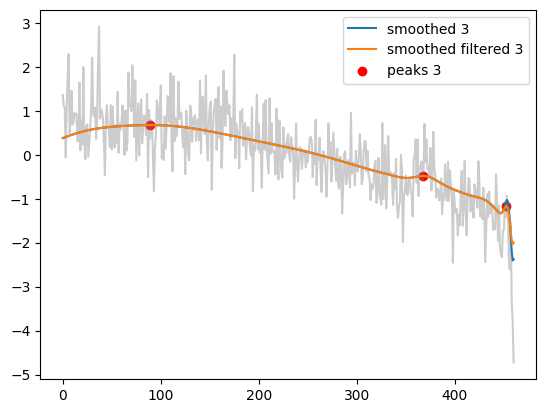

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79]
[-159.5 -158.5 -157.5 -156.5 -155.5 -154.5 -153.5 -152.5 -151.5 -150.5
 -149.5 -148.5 -147.5 -146.5 -145.5 -144.5 -143.5 -142.5 -141.5 -140.5
 -139.5 -138.5 -137.5 -136.5 -135.5 -134.5 -133.5 -132.5 -131.5 -130.5
 -129.5 -128.5 -127.5 -126.5 -125.5 -124.5 -123.5 -122.5 -121.5 -120.5
 -119.5 -118.5 -117.5 -116.5 -115.5 -114.5 -113.5 -112.5 -111.5 -110.5
 -109.5 -108.5 -107.5 -106.5 -105.5 -104.5 -103.5 -102.5 -101.5 -100.5
  -99.5  -98.5  -97.5  -96.5  -95.5  -94.5  -93.5  -92.5  -91.5  -90.5
  -89.5  -88.5  -87.5  -86.5  -85.5  -84.5  -83.5  -82.5  -81.5  -80.5
  -79.5  -78.5  -77.5  -76.5  -75.5  -74.5  -73.5  -72.5  -71.5  -70.5
  -69.5  -68.5  -67.5  -66.5  -65.5  -64.5  -63.5  -62.5  -61.5  -60.5
  -59.5  -58.5  -57.5  -56.5  -55.5  -54.5  -53.5  -52.5  -51.5  -50.5
  -49.5  -48.5  -47.

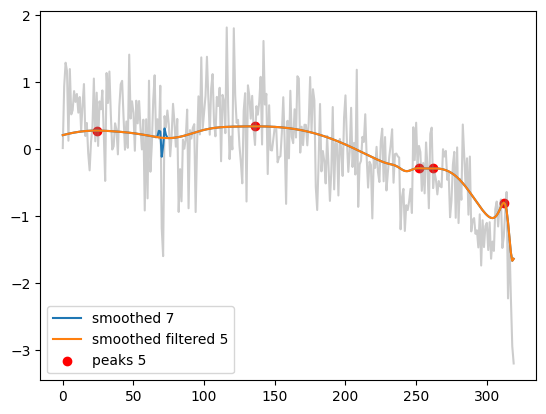

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  55  57
  59  61  63  65  67  69  71  73  75  77  79  81  83  85  87  89  91  93
  95  97  99 101 103 105 107 109 111 113 115 117 119 121 123 125 127 129
 131 133 135 137 139 141]
[-284.5 -283.5 -282.5 -281.5 -280.5 -279.5 -278.5 -277.5 -276.5 -275.5
 -274.5 -273.5 -272.5 -271.5 -270.5 -269.5 -268.5 -267.5 -266.5 -265.5
 -264.5 -263.5 -262.5 -261.5 -260.5 -259.5 -258.5 -257.5 -256.5 -255.5
 -254.5 -253.5 -252.5 -251.5 -250.5 -249.5 -248.5 -247.5 -246.5 -245.5
 -244.5 -243.5 -242.5 -241.5 -240.5 -239.5 -238.5 -237.5 -236.5 -235.5
 -234.5 -233.5 -232.5 -231.5 -230.5 -229.5 -228.5 -227.5 -226.5 -225.5
 -224.5 -223.5 -222.5 -221.5 -220.5 -219.5 -218.5 -217.5 -216.5 -215.5
 -214.5 -213.5 -212.5 -211.5 -210.5 -209.5 -208.5 -207.5 -206.5 -205.5
 -204.5 -203.5 -202.5 -201.5 -200.5 -199.

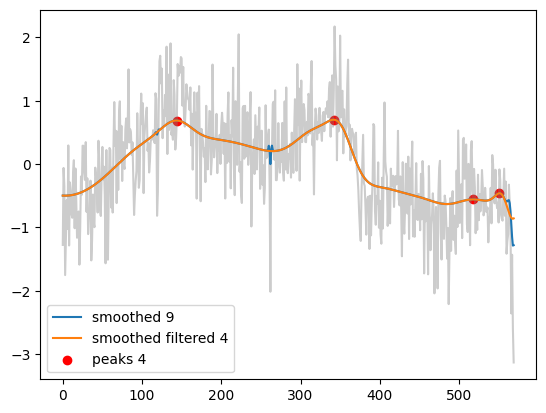

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  55  57
  59  61  63  65  67  69  71  73  75  77  79  81  83  85  87  89  91  93
  95  97  99 101 103 105 107 109 111 113 115 117 119 121 123 125 127 129
 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177]
[-355. -354. -353. -352. -351. -350. -349. -348. -347. -346. -345. -344.
 -343. -342. -341. -340. -339. -338. -337. -336. -335. -334. -333. -332.
 -331. -330. -329. -328. -327. -326. -325. -324. -323. -322. -321. -320.
 -319. -318. -317. -316. -315. -314. -313. -312. -311. -310. -309. -308.
 -307. -306. -305. -304. -303. -302. -301. -300. -299. -298. -297. -296.
 -295. -294. -293. -292. -291. -290. -289. -288. -287. -286. -285. -284.
 -283. -282. -281. -280. -279. -278. -277. -276. -275. -274. -273. -272.
 -271. -270. -269. -268. 

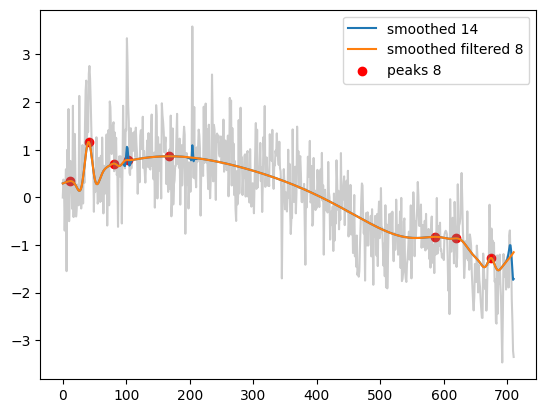

In [174]:

plts = []
coefs = []
sparseness = [1,1,1,1]
for i in range(len(elt_array)):
    elt = np.asarray(elt_array[i], dtype=np.float64)
    elt -= np.mean(elt)
    scale_switch = 50
    scales1 = np.arange(1, max(2, min(len(elt) // 4 + 1, scale_switch + 1)), step=sparseness[i])
    scales2 = np.arange(max(2, min(len(elt) // 4 + 1, scale_switch + 1)), max(2, len(elt) // 4 + 1), step=sparseness[i]+1)
    scales = np.concatenate((
        scales1, # bpdn.fractional_dyadic_grid(len(elt), 0.25)
        scales2, # bpdn.fractional_dyadic_grid(len(elt), 0.25)
    ))
    print(scales)
    shifts = np.concatenate((
        np.ones(len(scales1)), # bpdn.fractional_dyadic_grid(len(elt), 0.25)
        2*np.ones(len(scales2)), # bpdn.fractional_dyadic_grid(len(elt), 0.25)
    )) # np.ones(len(scales)) # bpdn.fractional_dyadic_grid(len(elt), 0.25)#np.ones(len(scales))
    dictionary = bpdn.ricker_cwt_dictionary(len(elt), scales, shifts, dtype=np.float64)
    dictionary_cpy = dictionary.copy()

    # dictionary terms with scale=n are 'mounds' with approx 3.6n points.
    # Mounds which are too short can be filtered out to help smooth the signal.
    min_pts_per_year = len(elt)/max_age
    print(f"min_pts_per_year: {min_pts_per_year}")
    expanded_scales = bpdn.expand_scales(len(elt), scales, shifts)
    pts_per_mound = 3.6*expanded_scales
    # plt.figure()
    # plt.plot(pts_per_mound)
    # plt.ylim((0,100))
    # plt.show()
    low_freq_scales_ix = pts_per_mound > (min_pts_per_year)

    def peak_prior(coef, X=dictionary_cpy, low_freq_ix=low_freq_scales_ix):
        low_freq_coef = coef * low_freq_ix[:, np.newaxis]
        smoothed = np.dot(X, low_freq_coef)
        prior_pdf = np.zeros(smoothed.shape[1])
        for model_ix in range(smoothed.shape[1]):
            peaks = filt.find_peaks(smoothed[:,model_ix])
            age = len(peaks)
            prior_pdf[model_ix] = truncated_geometric_pdf(mortality_rate, age)
        return prior_pdf

    coef, smoothed = bpdn.basis_pursuit_denoising(elt, dictionary, peak_prior, copy_dictionary=True)
    smoothed = np.dot(dictionary_cpy, coef)

    low_freq_coef = coef * low_freq_scales_ix
    low_freq_smoothed = np.dot(dictionary_cpy, low_freq_coef)
    
    p = plt.figure()
    p = plt.plot(elt, color="grey", alpha=0.4)
    n_peaks_smoothed = len(filt.find_peaks(smoothed))
    p = plt.plot(smoothed, label=f"smoothed {n_peaks_smoothed}")
    peak_locations = filt.find_peaks(low_freq_smoothed)
    n_peaks = len(peak_locations)
    p = plt.plot(low_freq_smoothed, label=f"smoothed filtered {n_peaks}")
    p = plt.scatter(peak_locations, low_freq_smoothed[peak_locations], label=f"peaks {n_peaks}", color="red")
    p = plt.legend()
    plt.show()
    
    # print(np.count_nonzero(coef))
    # plts.append(p)
    # plt.figure()
    # plt.plot(coef, label="Coefs")
    # plt.show()
    # coefs.append(coef)




<Figure size 640x480 with 0 Axes>

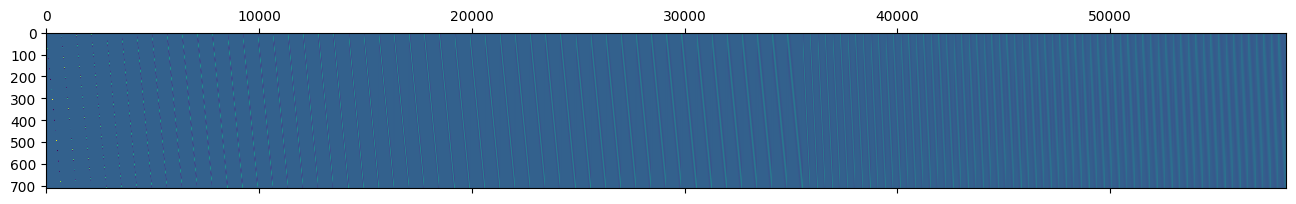

In [175]:
plt.figure()
plt.matshow(dictionary, aspect='auto', cmap='viridis')
plt.show()